In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_std_to_arrays(filename: str):
    # Load the CSV into a DataFrame
    df = pd.read_csv(filename)

    # Convert columns back into three separate arrays using column numbers
    array1 = df.iloc[:, 0:4].to_numpy()
    array2 = df.iloc[:, 4:8].to_numpy()

    return array1, array2

true_flux_std, pred_flux_std = load_std_to_arrays('../deterministic/FNNTest.csv')
true_flux_std

array([[0.25577733, 0.24348812, 0.24734177, 0.2533928 ],
       [0.2533928 , 0.24734177, 0.24348812, 0.25577733],
       [0.24734177, 0.2533928 , 0.25577733, 0.24348812],
       ...,
       [0.2491793 , 0.2454767 , 0.24984583, 0.25549817],
       [0.25549817, 0.24984583, 0.2454767 , 0.2491793 ],
       [0.24984583, 0.25549817, 0.2491793 , 0.2454767 ]])

In [3]:
def load_var_to_arrays(filename: str):
    # Load the CSV into a DataFrame
    df = pd.read_csv(filename)

    # Convert columns back into three separate arrays using column numbers
    array1 = df.iloc[:, 0:4].to_numpy()
    array2 = df.iloc[:, 4:8].to_numpy()
    array3 = df.iloc[:, 8:12].to_numpy()

    return array1, array2, array3

true_flux_var, pred_flux_var, pred_flux_sigma = load_var_to_arrays('../variational/vFNNTest.csv')
true_flux_var

array([[0.25577733, 0.24348812, 0.24734177, 0.2533928 ],
       [0.2533928 , 0.24734177, 0.24348812, 0.25577733],
       [0.24734177, 0.2533928 , 0.25577733, 0.24348812],
       ...,
       [0.2491793 , 0.2454767 , 0.24984583, 0.25549817],
       [0.25549817, 0.24984583, 0.2454767 , 0.2491793 ],
       [0.24984583, 0.25549817, 0.2491793 , 0.2454767 ]])

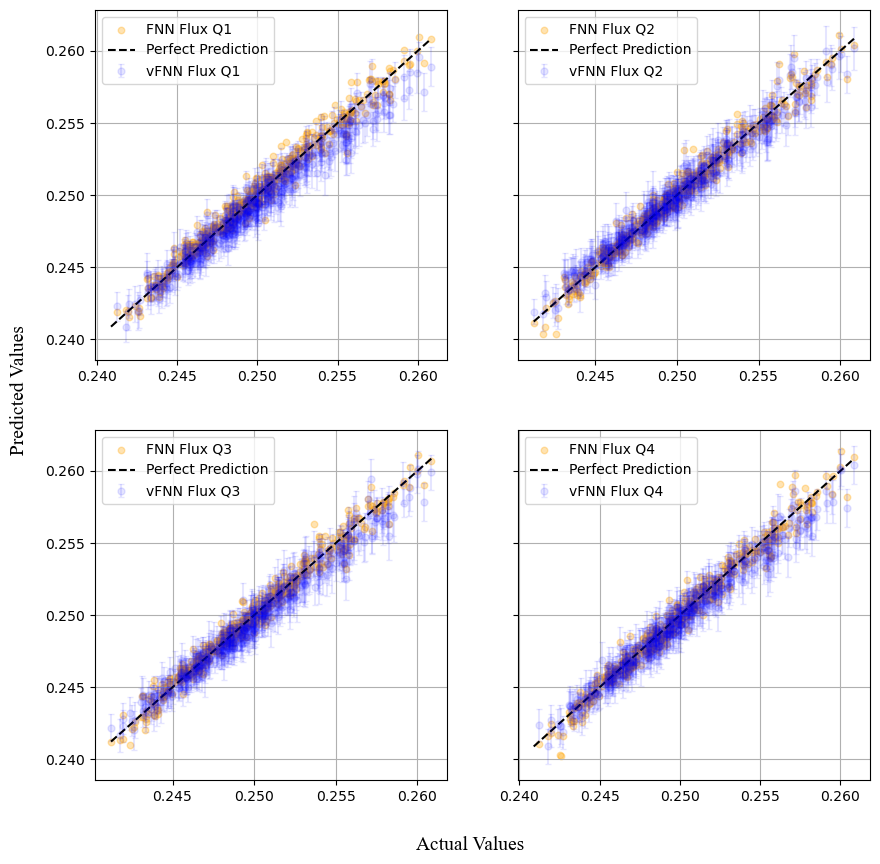

In [56]:
def plot_diagonal_validation_with_shared_labels(
    actuals, mean_predictions, uncertainty, deterministic_predictions
):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=True)  # Share x and y axes

    # Plot each flux in a separate subplot
    for i, ax in enumerate(axes.flatten()):
        # Plot probabilistic model predictions with error bars
        ax.errorbar(
            actuals[:, i],
            mean_predictions[:, i],
            yerr=uncertainty[:, i],
            fmt='o',
            alpha=0.1,
            capsize=2,
            label=f"vFNN Flux Q{i + 1}",
            color='blue',
            markersize=5
        )
        
        # Plot deterministic model predictions
        ax.scatter(
            actuals[:, i],
            deterministic_predictions[:, i],
            label=f"FNN Flux Q{i + 1}",
            color='orange',
            marker='o',
            alpha=0.3,
            s=22
        )
        
        # Diagonal line (perfect predictions)
        min_val = min(np.min(actuals[:, i]), np.min(mean_predictions[:, i]))
        max_val = max(np.max(actuals[:, i]), np.max(mean_predictions[:, i]))
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="Perfect Prediction")

        # Add titles and legend
        #ax.set_title(f"Flux Q{i + 1}", font='Times New Roman', fontsize=12)
        ax.legend()
        ax.grid(True)

    # Set shared x and y labels
    fig.text(0.5, 0.04, 'Actual Values', ha='center', fontsize=14, font='Times New Roman')
    fig.text(0.04, 0.5, 'Predicted Values', va='center', rotation='vertical', fontsize=14, font='Times New Roman')

    #plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust layout to avoid overlap
    plt.savefig("flux_pred_diag_plot.png", dpi=300, bbox_inches='tight')
    plt.show()


# Call the function with shared labels
plot_diagonal_validation_with_shared_labels(
    true_flux_var, pred_flux_var, pred_flux_sigma, pred_flux_std
)